## Running model and making predictions

run model on both davis validation set and the pharos reclassified

In [2]:
import pandas as pd
import numpy as np
import json
import pickle
import os
import sys
import torch
from torch_geometric.data import DataLoader

# Add the project directory to the Python path
sys.path.append('/Users/adele/Documents/GitHub/GraphDTA')

from models.gcn import GCNNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the validation dataset
validation_data = torch.load('/Users/adele/Documents/GitHub/GraphDTA/data/processed/davis_valid.pt')

# Create a DataLoader for the validation dataset
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=False)

model = GCNNet().to(device)

# Load the trained model weights (ensure the correct model path)
model_file_name = '/Users/adele/Documents/GitHub/GraphDTA/results/123/model_GCNNet_davis.model'  
model.load_state_dict(torch.load(model_file_name, map_location=device))
model.eval()  # Set the model to evaluation mode

# Define a function to make predictions
def predict_affinities(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    all_outputs = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for batch_data in dataloader:
            batch_data = batch_data.to(device)  # Move data to the appropriate device
            output = model(batch_data)  # Forward pass to get predictions
            all_outputs.append(output.cpu().numpy())  # Store outputs (convert to numpy if needed)

    return np.concatenate(all_outputs)  # Concatenate outputs into a single array

# Run predictions on the validation data
davis_valid_outputs = predict_affinities(model, validation_loader)

# Print or save the predictions
print("Predictions on validation dataset:", davis_valid_outputs)


/var/folders/0v/h_hg_1mj17d5ssrjq1z2m6x80000gp/T/ipykernel_14243/4008749383.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  validation_data = torch.load('/Users/adele/D

Predictions on validation dataset: [[8.292904]
 [8.301446]
 [8.300152]
 ...
 [8.301742]
 [8.301207]
 [8.30261 ]]


In [3]:
import torch
from torch_geometric.data import DataLoader
from models.gcn import GCNNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the validation dataset
validation_data = torch.load('data/processed/pharos.pt')

# Create a DataLoader for the validation dataset
validation_loader = DataLoader(validation_data, batch_size=32, shuffle=False)

# Define the model architecture (ensure this matches the one you used for training)
model = GCNNet().to(device) 

# Load the trained model weights (ensure the correct model path)
model_file_name = '/Users/adele/Documents/GitHub/GraphDTA/results/123/model_GCNNet_davis.model'
model.load_state_dict(torch.load(model_file_name, map_location=device))
model.eval()  # Set the model to evaluation mode

# Define a function to make predictions
def predict_affinities(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    all_outputs = []

    with torch.no_grad():  # Disable gradient calculation for inference
        for batch_data in dataloader:
            batch_data = batch_data.to(device)  # Move data to the appropriate device
            output = model(batch_data)  # Forward pass to get predictions
            all_outputs.append(output.cpu().numpy())  # Store outputs (convert to numpy if needed)

    return np.concatenate(all_outputs)  # Concatenate outputs into a single array

# Run predictions on the validation data
outputs = predict_affinities(model, validation_loader)

# Print or save the predictions
print("Predictions on validation dataset:", outputs)


/var/folders/0v/h_hg_1mj17d5ssrjq1z2m6x80000gp/T/ipykernel_14243/624994215.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  validation_data = torch.load('data/processed/p

Predictions on validation dataset: [[8.300232 ]
 [8.199131 ]
 [8.204449 ]
 [8.234372 ]
 [8.269542 ]
 [8.25353  ]
 [8.111231 ]
 [8.29334  ]
 [8.145283 ]
 [8.27085  ]
 [8.207489 ]
 [8.127758 ]
 [8.300552 ]
 [8.181277 ]
 [8.154013 ]
 [8.264162 ]
 [8.111231 ]
 [8.111231 ]
 [8.266038 ]
 [8.111231 ]
 [8.300821 ]
 [8.301097 ]
 [8.161855 ]
 [8.161855 ]
 [8.167231 ]
 [8.301749 ]
 [8.295464 ]
 [8.124384 ]
 [8.198316 ]
 [8.111231 ]
 [8.122914 ]
 [8.28406  ]
 [8.231092 ]
 [8.1356125]
 [8.245806 ]
 [8.253258 ]
 [8.222281 ]
 [8.111231 ]
 [8.300262 ]
 [8.2116995]
 [8.111231 ]
 [8.123695 ]
 [8.122774 ]
 [8.111231 ]
 [8.251307 ]
 [8.127758 ]
 [8.111231 ]
 [8.165222 ]
 [8.257345 ]
 [8.12421  ]
 [8.111231 ]
 [8.29334  ]
 [8.161906 ]
 [8.182736 ]
 [8.207489 ]
 [8.208959 ]
 [8.111231 ]
 [8.258743 ]
 [8.276478 ]
 [8.111231 ]
 [8.111231 ]
 [8.300552 ]
 [8.165995 ]
 [8.27085  ]
 [8.25353  ]
 [8.163589 ]
 [8.123532 ]
 [8.181277 ]
 [8.300248 ]
 [8.111231 ]
 [8.249581 ]
 [8.297052 ]
 [8.243502 ]
 [8.253768 ]
 [8

## Visualization

Mean Absolute Error (MAE): 0.903947575488232
Mean Squared Error (MSE): 1.1299329575909107
R-squared (R²): -1.9348339675934159


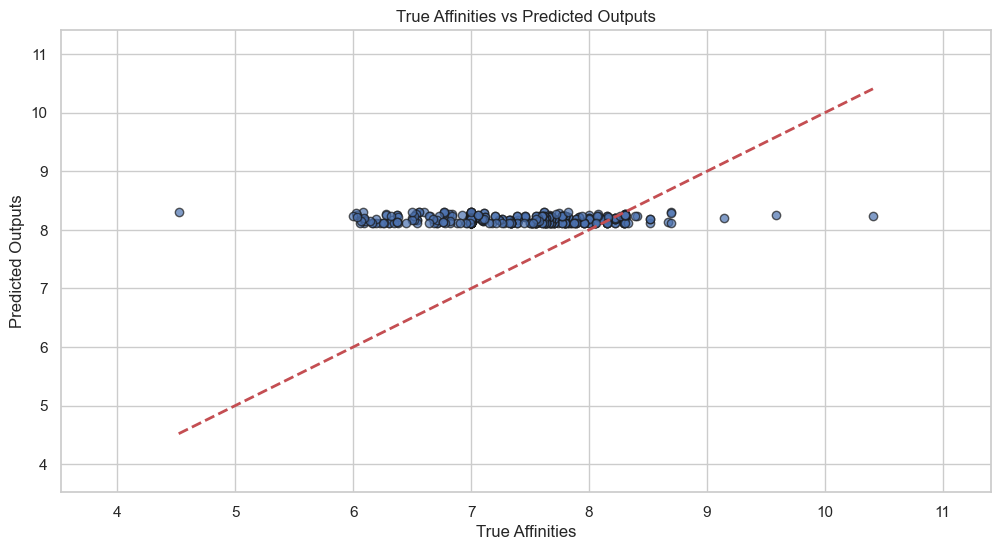

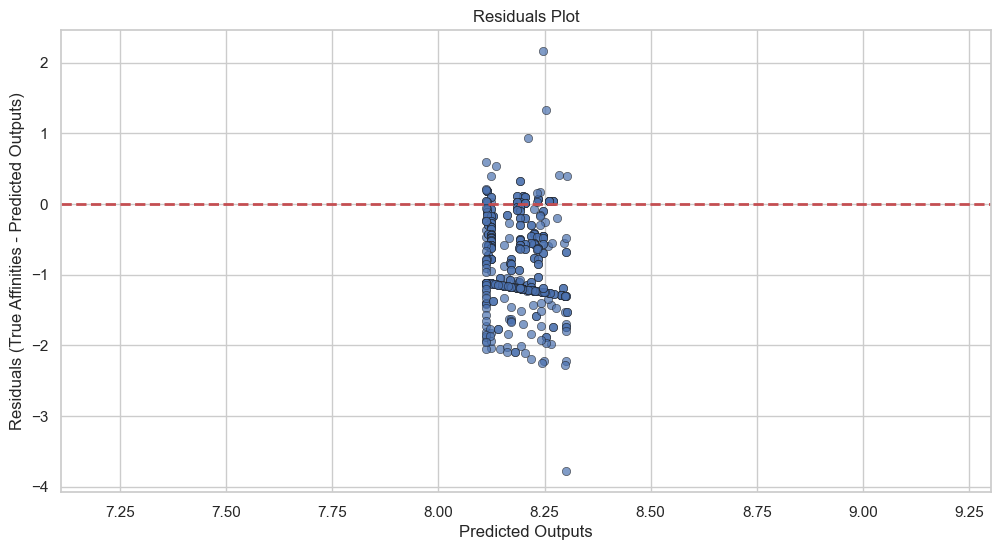

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the original data to get true affinity values
original_data = pd.read_csv('data/pharos.csv')

# Extract true affinity values from the original dataset
true_affinities = original_data['affinity'].values


# Step 4: Calculate evaluation metrics
mae = mean_absolute_error(true_affinities, outputs)
mse = mean_squared_error(true_affinities, outputs)
r2 = r2_score(true_affinities, outputs)

# Step 5: Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Data Visualization

# Ensure that outputs and true_affinities are 1D arrays
outputs = np.ravel(outputs)  # Flatten outputs if necessary
true_affinities = np.ravel(true_affinities)  # Flatten true affinities if necessary

# Calculate residuals
residuals = true_affinities - outputs

# Set the style of seaborn
sns.set(style='whitegrid')

# Scatter plot: True vs Predicted Affinities
plt.figure(figsize=(12, 6))
plt.scatter(true_affinities, outputs, alpha=0.7, edgecolors='k')
plt.plot([true_affinities.min(), true_affinities.max()], 
         [true_affinities.min(), true_affinities.max()], 
         'r--', lw=2)  # Diagonal line for reference
plt.title('True Affinities vs Predicted Outputs')
plt.xlabel('True Affinities')
plt.ylabel('Predicted Outputs')
plt.xlim(true_affinities.min() - 1, true_affinities.max() + 1)
plt.ylim(true_affinities.min() - 1, true_affinities.max() + 1)
plt.show()

# Residual plot: Errors
plt.figure(figsize=(12, 6))
sns.scatterplot(x=outputs, y=residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Line at zero for reference
plt.title('Residuals Plot')
plt.xlabel('Predicted Outputs')
plt.ylabel('Residuals (True Affinities - Predicted Outputs)')
plt.xlim(outputs.min() - 1, outputs.max() + 1)
plt.show()


# DAVIS

Mean Absolute Error (MAE): 2.902687927627188
Mean Squared Error (MSE): 8.991390347620968
R-squared (R²): -13.573560469505553


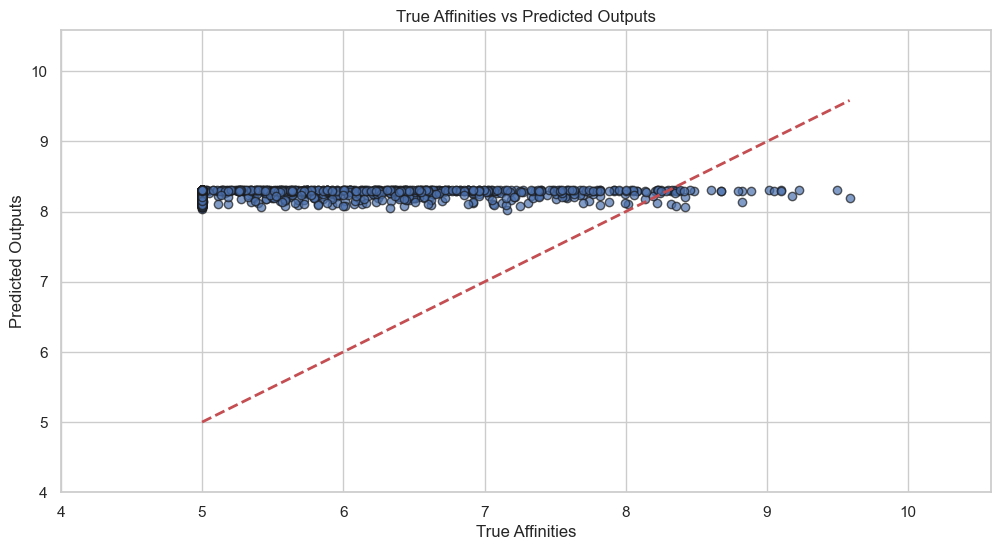

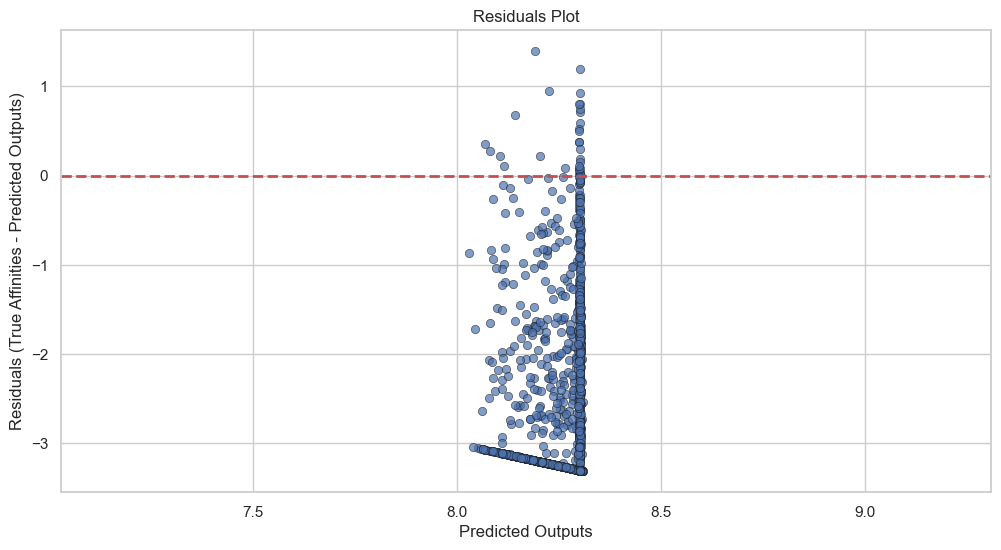

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load the original data to get true affinity values
original_data = pd.read_csv('../data/davis/davis_valid.csv')

# Extract true affinity values from the original dataset
true_affinities = original_data['Y'].values


# Step 4: Calculate evaluation metrics
mae = mean_absolute_error(true_affinities, davis_valid_outputs)
mse = mean_squared_error(true_affinities, davis_valid_outputs)
r2 = r2_score(true_affinities, davis_valid_outputs)

# Step 5: Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

# Data Visualization

# Ensure that outputs and true_affinities are 1D arrays
davis_valid_outputs = np.ravel(davis_valid_outputs)  # Flatten outputs if necessary
true_affinities = np.ravel(true_affinities)  # Flatten true affinities if necessary

# Calculate residuals
residuals = true_affinities - davis_valid_outputs

# Set the style of seaborn
sns.set(style='whitegrid')

# Scatter plot: True vs Predicted Affinities
plt.figure(figsize=(12, 6))
plt.scatter(true_affinities, davis_valid_outputs, alpha=0.7, edgecolors='k')
plt.plot([true_affinities.min(), true_affinities.max()], 
         [true_affinities.min(), true_affinities.max()], 
         'r--', lw=2)  # Diagonal line for reference
plt.title('True Affinities vs Predicted Outputs')
plt.xlabel('True Affinities')
plt.ylabel('Predicted Outputs')
plt.xlim(true_affinities.min() - 1, true_affinities.max() + 1)
plt.ylim(true_affinities.min() - 1, true_affinities.max() + 1)
plt.show()

# Residual plot: Errors
plt.figure(figsize=(12, 6))
sns.scatterplot(x=davis_valid_outputs, y=residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Line at zero for reference
plt.title('Residuals Plot')
plt.xlabel('Predicted Outputs')
plt.ylabel('Residuals (True Affinities - Predicted Outputs)')
plt.xlim(davis_valid_outputs.min() - 1, davis_valid_outputs.max() + 1)
plt.show()

